In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df = pd.read_csv(r'..\..\data\raw\Data_Entry_2017.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

In [4]:
# Get all unique label combinations from the "Finding Labels" column
unique_label_combinations  = df['Finding Labels'].unique()

# Split each row's label combination into a list of individual labels
individual_labels_per_row = [labels.split('|') for labels in list(df['Finding Labels'])]

In [5]:
label_binarizer  = MultiLabelBinarizer()
binary_label_matrix  = label_binarizer.fit_transform(individual_labels_per_row)

In [6]:
unique_labels = list(label_binarizer.classes_)
print(unique_labels)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [7]:
binary_label_matrix

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
# Create a new DataFrame from the binary label matrix
binary_label_df = pd.DataFrame(binary_label_matrix)
binary_label_df = binary_label_df.set_axis(unique_labels, axis=1)
binary_label_df.insert(0, "Image Path", value=df["Image Index"])
binary_label_df.columns = binary_label_df.columns.str.lower().str.replace(' ', '_')
binary_label_df.head()

,image_path,atelectasis,cardiomegaly,consolidation,edema,effusion,emphysema,fibrosis,hernia,infiltration,mass,no_finding,nodule,pleural_thickening,pneumonia,pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
# saving the preprocssed file
df.to_csv(r'..\..\data\interim\data_entry_preprocessed.csv', index=False)

# Sanket's Code

import os
import cv2
from PIL import Image

In [10]:
import pandas as pd

In [19]:
# get the path/directory
folder_dir = "Dataset/images"
for images in os.listdir(folder_dir):
 
    # Reading the image from the present directory
    image = cv2.imread(f"Dataset/images/{images}")
    
    # The initial processing of the image
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The declaration of CLAHE
    # clipLimit -> Threshold for contrast limiting
    # tileGridSize -> Number of tiles in the row and column
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(10, 10))
    final_img = clahe.apply(image_bw)

    # Adjust the brightness of the output
    final_img = cv2.add(final_img, 5)
    
    #Saving the image in seperate folder
    im = Image.fromarray(final_img) 
    image_path = "Dataset/IMAGE"
    im.save(f"{image_path}/{images}")
print("Task Completed")

Task Completed


In [22]:
df = pd.read_csv(r"..\..\data\raw\labels.csv", index_col=0)
df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Path,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
def total_instances():
    
    total_data = []

    for i in unique_labels:
        total = df[i].value_counts()[1]
        total_data.append(total)

    return total_data

In [24]:
total_data = total_instances()

In [25]:
total_data

[np.int64(11559),
 np.int64(2776),
 np.int64(4667),
 np.int64(2303),
 np.int64(13317),
 np.int64(2516),
 np.int64(1686),
 np.int64(227),
 np.int64(19894),
 np.int64(5782),
 np.int64(60361),
 np.int64(6331),
 np.int64(3385),
 np.int64(1431),
 np.int64(5302)]

In [26]:
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 11559 
Cardiomegaly = 2776 
Consolidation = 4667 
Edema = 2303 
Effusion = 13317 
Emphysema = 2516 
Fibrosis = 1686 
Hernia = 227 
Infiltration = 19894 
Mass = 5782 
No Finding = 60361 
Nodule = 6331 
Pleural_Thickening = 3385 
Pneumonia = 1431 
Pneumothorax = 5302 


In [27]:
def show_plot():
    total_data = []
    for i in unique_labels:
        total = df[i].value_counts()[1]
        total_data.append(total)

    ax = pd.DataFrame({'li': unique_labels, 'total_data': total_data})
    fig = sns.barplot(x = "li", y = "total_data",data = ax)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title("Counts")
    plt.xticks(rotation = 90)
    plt.show(fig)

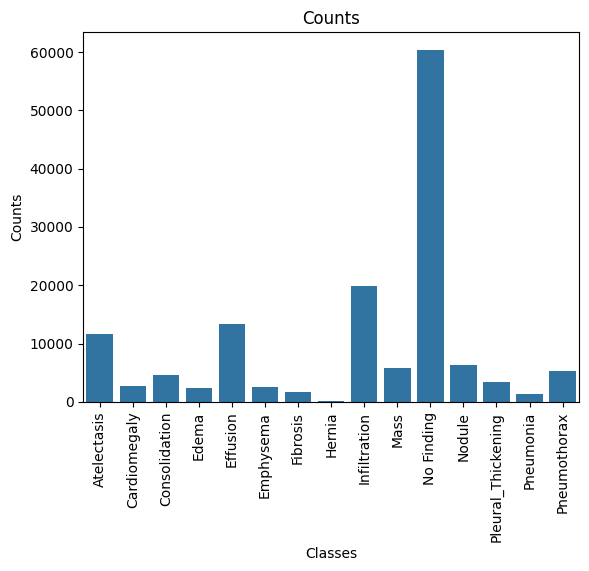

In [28]:
show_plot()

As you can see in the above bar chart that the dataset is highly imbalanced as the No Finding class contains 60361 images which is about 53% of the whole dataset whereas Hernia contains only 227 images. And this imbalanced dataset further result in a high biased model predictions and poor performance on minority classes. So it is very important to first balance the dataset with the help of techniques like UnderSampling & Oversampling to make it balance then proceed for training.

# Undersampling

To balance the classes I will first randomly remove some rows of certain classes to achieve balance in the dataset.

No Finding

60,361 - 5,000 = 55361

In [29]:
a = (df[df["No Finding"] == 1].sample(55361).index)
list(a)
len(a)

55361

In [30]:
for i in a:
    df.drop(index = i, inplace=True)

In [31]:
df.shape, df["No Finding"].value_counts()

((56759, 15),
 No Finding
 0    51759
 1     5000
 Name: count, dtype: int64)

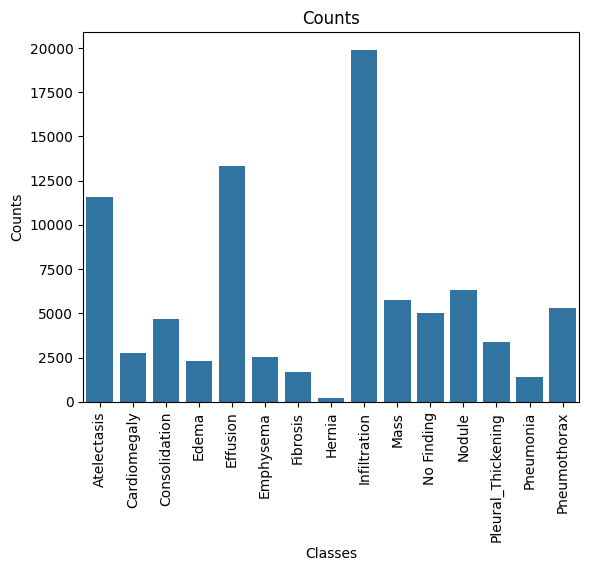

In [32]:
show_plot()


So here the total rows for "No Finding" has dropped to 5000. Now, its time to balance next class.



### Infilteration

In [33]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 11559 
Cardiomegaly = 2776 
Consolidation = 4667 
Edema = 2303 
Effusion = 13317 
Emphysema = 2516 
Fibrosis = 1686 
Hernia = 227 
Infiltration = 19894 
Mass = 5782 
No Finding = 5000 
Nodule = 6331 
Pleural_Thickening = 3385 
Pneumonia = 1431 
Pneumothorax = 5302 


19894 - 5000 = 14894



In [34]:
a = (df[df["Infiltration"] == 1].sample(14894).index)
print(list(a))

['00008397_018.png', '00011723_033.png', '00004381_035.png', '00016240_001.png', '00012021_077.png', '00018102_001.png', '00020286_007.png', '00026560_013.png', '00030079_040.png', '00022111_000.png', '00005201_009.png', '00011544_018.png', '00008745_012.png', '00014879_001.png', '00016348_000.png', '00027726_010.png', '00028240_001.png', '00017017_014.png', '00019176_078.png', '00019812_007.png', '00022846_002.png', '00020106_002.png', '00018464_000.png', '00010775_014.png', '00020928_005.png', '00023224_000.png', '00017503_003.png', '00018187_056.png', '00006481_001.png', '00027725_030.png', '00003347_000.png', '00027320_012.png', '00025839_013.png', '00030419_003.png', '00003425_001.png', '00010447_016.png', '00019592_002.png', '00000246_013.png', '00003392_029.png', '00015605_047.png', '00007352_003.png', '00019401_001.png', '00018707_000.png', '00028948_003.png', '00029387_005.png', '00010007_035.png', '00022237_030.png', '00026144_006.png', '00004007_015.png', '00004196_007.png',

In [35]:
for i in a:
    df.drop(index = i, inplace=True)

In [36]:
df.shape, df["Infiltration"].value_counts()


((41865, 15),
 Infiltration
 0    36865
 1     5000
 Name: count, dtype: int64)

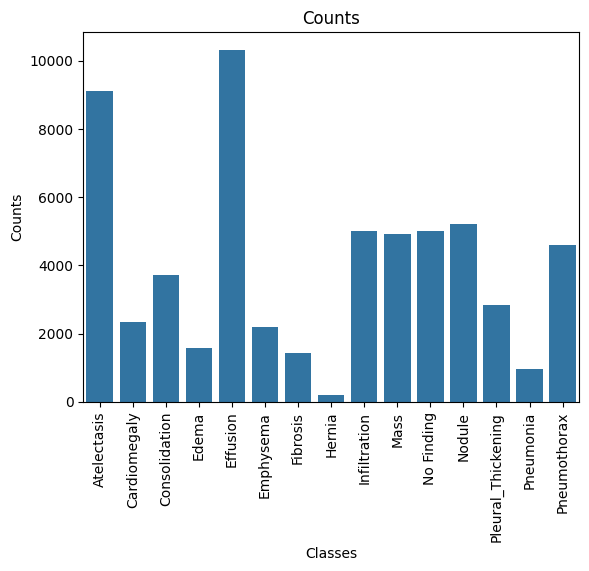

In [37]:
show_plot()


### Effusion

In [38]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 9113 
Cardiomegaly = 2343 
Consolidation = 3724 
Edema = 1565 
Effusion = 10318 
Emphysema = 2180 
Fibrosis = 1431 
Hernia = 197 
Infiltration = 5000 
Mass = 4914 
No Finding = 5000 
Nodule = 5210 
Pleural_Thickening = 2828 
Pneumonia = 974 
Pneumothorax = 4598 


In [39]:
a = (df[df["Effusion"] == 1].sample(5296).index)
print(list(a))

['00003072_031.png', '00013613_005.png', '00012576_002.png', '00025234_007.png', '00022837_014.png', '00000116_020.png', '00029991_013.png', '00010456_009.png', '00007138_007.png', '00003988_002.png', '00011859_003.png', '00013244_008.png', '00026717_001.png', '00015386_019.png', '00020125_002.png', '00006626_005.png', '00009001_005.png', '00018427_004.png', '00013285_029.png', '00015530_103.png', '00014870_003.png', '00015064_000.png', '00014751_000.png', '00015530_105.png', '00001373_018.png', '00013285_012.png', '00030159_013.png', '00029465_004.png', '00022290_024.png', '00008911_002.png', '00003426_024.png', '00014905_004.png', '00004402_007.png', '00013757_000.png', '00020482_044.png', '00013993_102.png', '00021455_005.png', '00021367_002.png', '00021817_006.png', '00007916_012.png', '00010775_015.png', '00009736_015.png', '00007034_050.png', '00020158_004.png', '00014596_003.png', '00018362_016.png', '00013123_006.png', '00020213_058.png', '00010335_001.png', '00001483_022.png',

In [40]:
for i in a:
    df.drop(index = i, inplace=True)

In [41]:
df.shape, df["Effusion"].value_counts()


((36569, 15),
 Effusion
 0    31547
 1     5022
 Name: count, dtype: int64)

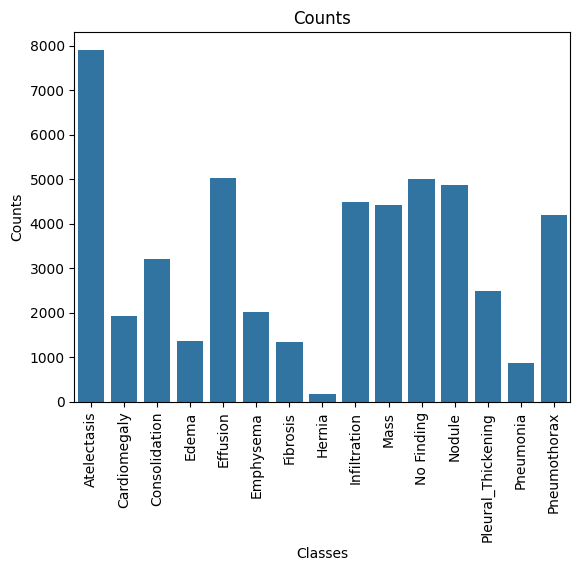

In [42]:
show_plot()

### Atelectasis

In [43]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 7903 
Cardiomegaly = 1924 
Consolidation = 3202 
Edema = 1362 
Effusion = 5022 
Emphysema = 2025 
Fibrosis = 1344 
Hernia = 185 
Infiltration = 4484 
Mass = 4411 
No Finding = 5000 
Nodule = 4858 
Pleural_Thickening = 2493 
Pneumonia = 868 
Pneumothorax = 4190 


In [44]:
a = (df[df["Atelectasis"] == 1].sample(2931).index)
print(list(a))

['00000697_007.png', '00010547_003.png', '00011211_011.png', '00010035_000.png', '00007962_005.png', '00017061_004.png', '00004023_000.png', '00010535_027.png', '00011999_001.png', '00027311_005.png', '00023128_013.png', '00007034_002.png', '00018366_052.png', '00003978_000.png', '00021796_000.png', '00030300_002.png', '00012471_004.png', '00020408_051.png', '00014616_003.png', '00000707_003.png', '00004858_038.png', '00015831_010.png', '00016350_005.png', '00028290_000.png', '00006046_000.png', '00011325_004.png', '00019395_014.png', '00026399_008.png', '00004917_015.png', '00021700_012.png', '00023156_001.png', '00017375_000.png', '00014956_033.png', '00010940_001.png', '00022651_022.png', '00011522_005.png', '00001220_000.png', '00018088_000.png', '00015530_022.png', '00013995_000.png', '00017137_015.png', '00008822_000.png', '00005348_007.png', '00010741_001.png', '00013467_018.png', '00010647_004.png', '00030346_001.png', '00012460_006.png', '00025750_004.png', '00020123_002.png',

In [45]:
for i in a:
    df.drop(index = i, inplace=True)

In [46]:
df.shape, df["Atelectasis"].value_counts()


((33638, 15),
 Atelectasis
 0    28666
 1     4972
 Name: count, dtype: int64)

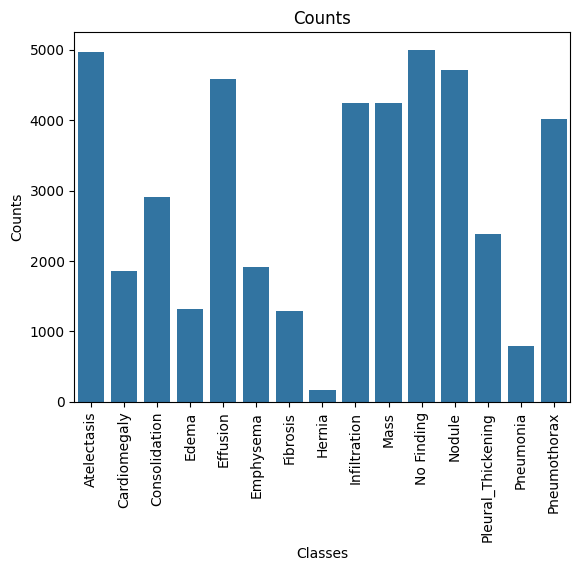

In [47]:
show_plot()

In [48]:
df.shape


(33638, 15)

In [49]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 4972 
Cardiomegaly = 1853 
Consolidation = 2913 
Edema = 1323 
Effusion = 4590 
Emphysema = 1920 
Fibrosis = 1289 
Hernia = 171 
Infiltration = 4247 
Mass = 4240 
No Finding = 5000 
Nodule = 4709 
Pleural_Thickening = 2383 
Pneumonia = 800 
Pneumothorax = 4015 


Now the maximum instance of any class is not more than 5000 so undersampling is done and will proceed towards oversampling/data augmentation so that each class will contain around 5000 instances.

Before continuing further, we will delete the instance image form the image dataset. Currently there are 112120 images in the dataset and I will reduce it to 33638.

112120 - 33638 = 78482

# Oversampling

First I will start from hernia as it has the lowest instances among any of the classes.

Hernia

5000 - 182 = 4818

In [50]:
df.shape


(33638, 15)

In [51]:
df.to_csv("../../data/raw/labels_undersampled.csv", index= False)


In [52]:
t_df = df
t_df


,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Path,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
00000003_002.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00030793_000.png,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
00030795_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
00030798_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
t_df = t_df.reset_index(drop = True)
t_df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33633,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
33634,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
33635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
33636,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
import albumentations as A
import tensorflow as tf
from tensorflow.keras.preprocessing import image